In [102]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [104]:
((X_train, Y_train), (X_test, Y_test)) = cifar10.load_data()
X_train = X_train.reshape((X_train.shape[0], 32 * 32 * 3))
X_test = X_test.reshape((X_test.shape[0], 32 * 32 * 3))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [105]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [106]:
X_train.shape

(50000, 3072)

In [107]:
Y_train.shape

(50000, 10)

In [108]:
model = Sequential()
model.add(Dense(128, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [110]:
sgd = SGD(0.01)
epochs=50
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/50
391/391 [==============================] - 45s 11ms/step - loss: 2.2271 - accuracy: 0.2361 - val_loss: 2.2110 - val_accuracy: 0.2633
Epoch 2/50
391/391 [==============================] - 4s 11ms/step - loss: 2.1925 - accuracy: 0.2507 - val_loss: 2.1745 - val_accuracy: 0.2644
Epoch 3/50
391/391 [==============================] - 5s 14ms/step - loss: 2.1553 - accuracy: 0.2600 - val_loss: 2.1380 - val_accuracy: 0.2674
Epoch 4/50
391/391 [==============================] - 4s 11ms/step - loss: 2.1195 - accuracy: 0.2695 - val_loss: 2.1031 - val_accuracy: 0.2737
Epoch 5/50
391/391 [==============================] - 4s 11ms/step - loss: 2.0873 - accuracy: 0.2745 - val_loss: 2.0727 - val_accuracy: 0.2815
Epoch 6/50
391/391 [==============================] - 4s 11ms/step - loss: 2.0592 - accuracy: 0.2812 - val_loss: 2.0464 - val_accuracy: 0.2880
Epoch 7/50
391/391 [==============================] - 5s 14ms/step - loss: 2.0348 - accuracy: 0.2877 - val_loss: 2.0233 - val_accuracy: 0.289

In [111]:
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.42      0.49      0.45      1000
           1       0.42      0.46      0.44      1000
           2       0.26      0.18      0.21      1000
           3       0.28      0.19      0.23      1000
           4       0.35      0.32      0.33      1000
           5       0.34      0.35      0.35      1000
           6       0.37      0.49      0.42      1000
           7       0.44      0.37      0.40      1000
           8       0.45      0.50      0.48      1000
           9       0.45      0.49      0.47      1000

    accuracy                           0.39     10000
   macro avg       0.38      0.39      0.38     10000
weighted avg       0.38      0.39      0.38     10000



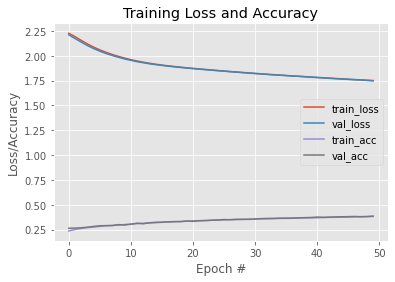

In [112]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()